#### Choosing the Optimal Number of Clusters $ K $

To determine the best number of clusters $ K $, we can use the following methods:
- Elbow Method with Within-Cluster Sum of Squares (WCSS) as the distance metric:
    $$
    \text{WCSS} = \sum_{C_k}^{C_K} \left( \sum_{x^{(i)} \in C_k}^{x^m} \text{distance}(x^{(i)}, \mu_k)^2 \right)
    $$
    Here:
    - $ C_k $: Represents the $ k $-th cluster.
    - $ x^{(i)} $: Represents a data point within cluster $ C_k $.
    - $ \mu_k $: Represents the centroid of cluster $ C_k $.
    - $ \text{distance}(x^{(i)}, \mu_k)^2 $: Denotes the squared distance between a data point and its cluster centroid.

- Silhouette Coefficient (it measures the quality of clustering based on the separation and cohesion of the clusters).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scratch_libraries.kmeans import KMeans
from scratch_libraries.kmedoids import KMedoids
from sklearn.cluster import KMeans as KMeans_scikit

from sklearn import datasets
from sklearn.metrics import silhouette_score

In [2]:
# Step 1: Data Preparation
proc_data, y_true = datasets.make_blobs(n_samples=500,
                                        n_features=2,
                                        centers=4,
                                        cluster_std=1,
                                        center_box=(-10.0, 10.0),
                                        shuffle=True,
                                        random_state=88)  # For reproducibility

# Normalize the data
mean = np.mean(proc_data, axis=0)
std = np.std(proc_data, axis=0)
proc_data = (proc_data - mean) / std

In [3]:
# Step 2: Elbow Method Implementation (with WCSS as distance metric)

# Initialize list to store WCSS for different K
wcss = []

# Define range of K values to try
K_range = range(1, 11)  # 1 to 10

for K in K_range:
    # Initialize KMeans with current K
    kmeans = KMeans(n_clusters=K, random_state=42)
    # Fit the model
    kmeans.fit(proc_data)
    # Predict cluster assignments
    y_pred = kmeans.predict(proc_data)

    # Calculate WCSS
    current_wcss = 0
    for cluster in range(K):
        # Get all points assigned to the current cluster
        cluster_points = proc_data[y_pred == cluster]
        if cluster_points.size == 0:
            continue  # Avoid division by zero
        # Calculate squared distances to the centroid
        squared_distances = np.sum((cluster_points - kmeans.cluster_centers_[cluster]) ** 2)
        # Add to current WCSS
        current_wcss += squared_distances
    # Append current WCSS to the lists
    wcss.append(current_wcss)

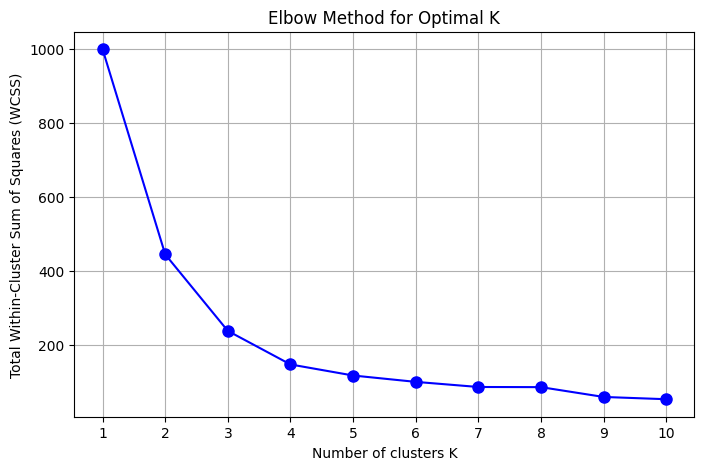

In [4]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters K')
plt.ylabel('Total Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [5]:
## Let's repeat this but this time using Scikit-Learn implementation of the Kmeans algorithm

# Initialize list to store WCSS for different K
wcss = []

# Define range of K values to try
K_range = range(1, 11)  # 1 to 10

for K in K_range:
    # Initialize KMeans with current K
    kmeans_scikit = KMeans_scikit(n_clusters=K, random_state=42)
    # Fit the model
    kmeans_scikit.fit(proc_data)
    # Predict cluster assignments
    y_pred_scikit = kmeans_scikit.predict(proc_data)

    # Calculate WCSS
    current_wcss = 0
    for cluster in range(K):
        current_wcss += kmeans_scikit.inertia_
    # Append current WCSS to the lists
    wcss.append(current_wcss)

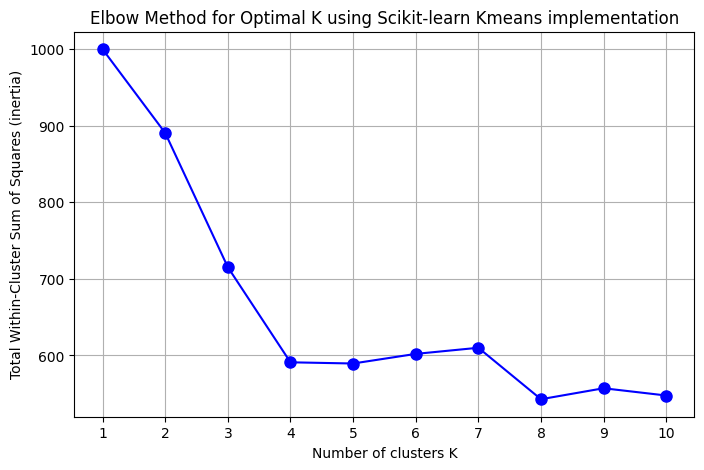

In [6]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal K using Scikit-learn Kmeans implementation')
plt.xlabel('Number of clusters K')
plt.ylabel('Total Within-Cluster Sum of Squares (inertia)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Based on the two Elbow Method plots, we are left with a choice between $ K=4 $ and $ K=3 $ as the optimal number of clusters.

However, we will see that the Silhouette score for $ K=4 $ is higher than for $ K=3 $.

-> It’s important to note that while the Elbow Method focuses on evaluating the compactness of the clusters, it doesn’t account for the separation between them. This is why the Silhouette score can be a better metric to consider.

In [7]:
# Let's try K=3
optimal_K = 3

# K-Means with Optimal K
kmeans_optimal = KMeans(n_clusters=optimal_K, random_state=42)
kmeans_optimal.fit(proc_data)
y_pred_kmeans = kmeans_optimal.predict(proc_data)

print(f"Silhouette Coefficient for K-Means with K={optimal_K}:\t{silhouette_score(proc_data, y_pred_kmeans):.4f}")

Silhouette Coefficient for K-Means with K=3:	0.5140


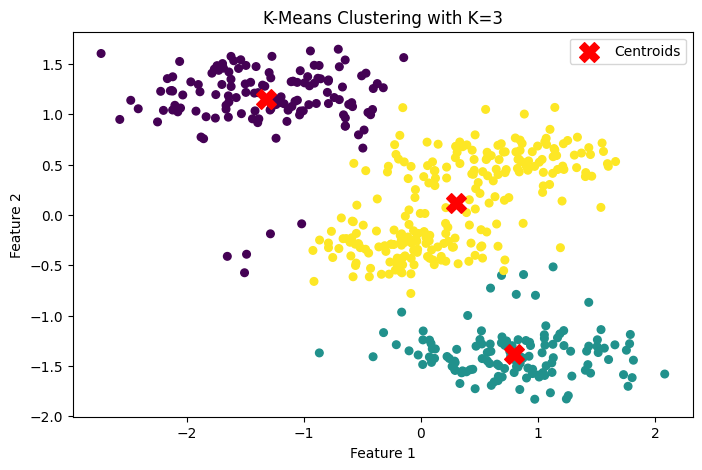

In [8]:
# Plot K-Means Clustering Results
plt.figure(figsize=(8, 5))
plt.scatter(proc_data[:, 0], proc_data[:, 1], c=y_pred_kmeans, s=30, cmap='viridis') # plot points appartaining to the K clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids') # plot the K centroids
plt.title(f"K-Means Clustering with K={optimal_K}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [9]:
# Let's now try K=4
optimal_K = 4

# K-Means with Optimal K
kmeans_optimal = KMeans(n_clusters=optimal_K, random_state=42)
kmeans_optimal.fit(proc_data)
y_pred_kmeans = kmeans_optimal.predict(proc_data)
print(f"Silhouette Coefficient for K-Means with K={optimal_K}:\t{silhouette_score(proc_data, y_pred_kmeans):.4f}")

Silhouette Coefficient for K-Means with K=4:	0.5400


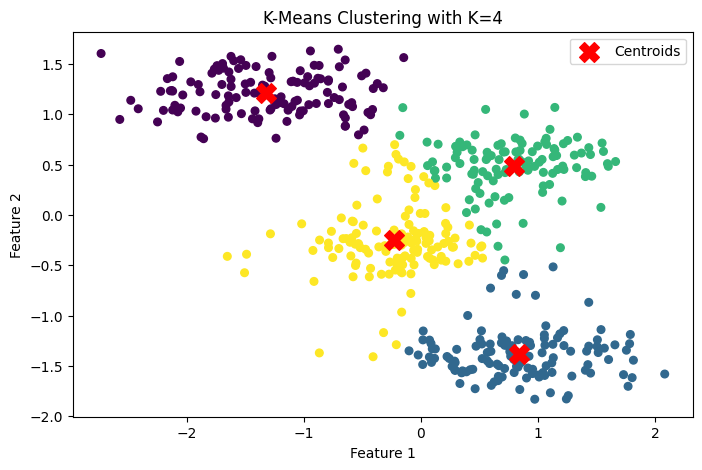

In [10]:
# Plot K-Means Clustering Results
plt.figure(figsize=(8, 5))
plt.scatter(proc_data[:, 0], proc_data[:, 1], c=y_pred_kmeans, s=30, cmap='viridis') # plot points appartaining to the K clusters
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids') # plot the K centroids
plt.title(f"K-Means Clustering with K={optimal_K}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

So, at the end we choose $ K=4 $.

Now, another thing we can do is also see how k-medoids performs vs k-Means.

In [11]:
# K-Medoids from scratch
kmedoids_obj = KMedoids(n_clusters=optimal_K, random_state=46)
kmedoids_obj.fit(proc_data)
y_pred_kmedoids = kmedoids_obj.predict(proc_data)
print(f"Silhouette Coefficient for K-Medoids with K={optimal_K}:\t{silhouette_score(proc_data, y_pred_kmedoids):.4f}")

Silhouette Coefficient for K-Medoids with K=4:	0.5407


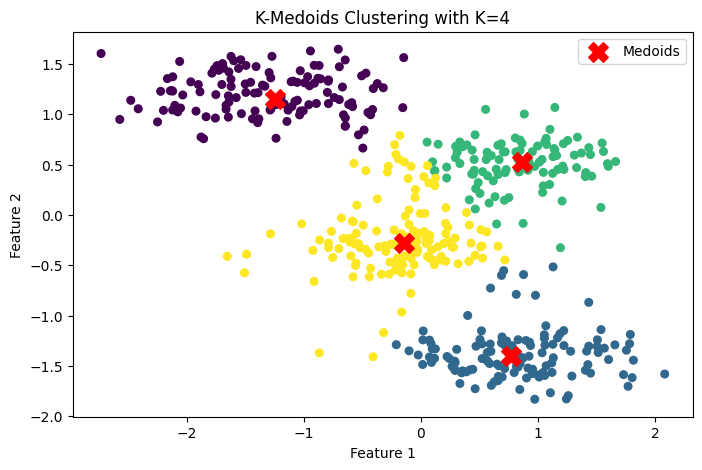

In [12]:
# Plot K-Medoids Clustering Results
plt.figure(figsize=(8, 5))
plt.scatter(proc_data[:, 0], proc_data[:, 1], c=y_pred_kmedoids, s=30, cmap='viridis')
plt.scatter(kmedoids_obj.cluster_centers_[:, 0], kmedoids_obj.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Medoids')
plt.title(f"K-Medoids Clustering with K={optimal_K}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

We can see that K-Medoids performs a little better than K-means in this case. 

**Note**: Moreover, notice how K-medoids uses exact data points as centers of the clusters, while K-means just the mean.

---

#### DBSCAN with Scikit-Learn

In [44]:
from sklearn.cluster import DBSCAN

# Experiment with different eps and min_samples values
# eps_values = [0.2, 0.3, 0.5]
# min_samples_values = [3, 4, 10]
# BEST: eps=0.2, min_samples=4

dbscan_obj = DBSCAN(eps=0.2, min_samples=4)
dbscan_obj.fit(proc_data)
y_pred_dbscan = dbscan_obj.labels_

# Silhouette score requires at least 2 clusters
if len(set(y_pred_dbscan)) > 1:
    dbscan_silhouette = silhouette_score(proc_data, y_pred_dbscan)
    print(f"Silhouette Coefficient for DBSCAN:\t{dbscan_silhouette:.4f}")
else:
    print("Silhouette Coefficient for DBSCAN:\tCannot compute silhouette score with only one cluster.")

Silhouette Coefficient for DBSCAN:	0.4814


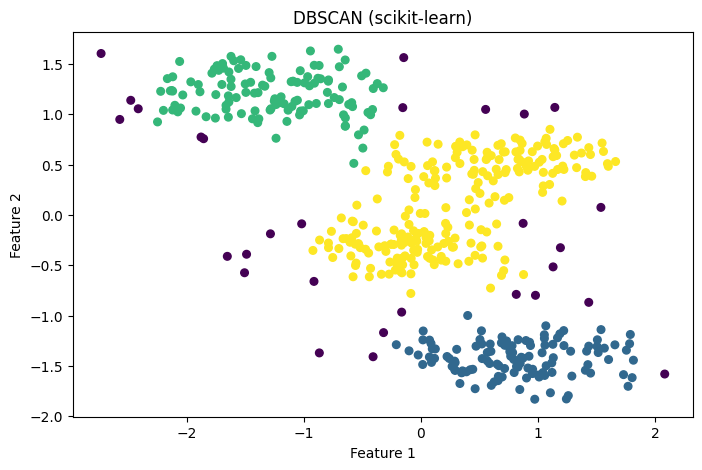

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(proc_data[:, 0], proc_data[:, 1], c=y_pred_dbscan, s=30, cmap='viridis')
plt.title("DBSCAN (scikit-learn)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()